In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

DATA_PATH="../data/sz_taxi_202006/"

%pwd

'/home/cseadmin/dz/TrafficFlowModel/model'

bin

---

In [2]:
traj_list=np.load("../data/sz_taxi_202006/sz_taxi_202006_traj_list.npy", allow_pickle=True)

len(traj_list)
traj_list[0]

1751602

[[198, Timestamp('2020-06-01 00:43:29'), 56.0],
 [199, Timestamp('2020-06-01 00:43:49'), 55.5],
 [448, Timestamp('2020-06-01 00:44:09'), 55.0]]

In [3]:
traj_list_bin_24=[[] for _ in range(24)]

for traj in traj_list:
    traj_list_bin_24[traj[0][1].hour].append(traj)
    
list(map(len, traj_list_bin_24))

[88134,
 79532,
 62254,
 47490,
 35925,
 32507,
 44365,
 81156,
 103175,
 102504,
 100915,
 95067,
 78162,
 81304,
 93555,
 89696,
 76454,
 72476,
 85763,
 86100,
 76114,
 64580,
 47119,
 27255]

In [6]:
np.save("../data/sz_taxi_202006/sz_taxi_202006_traj_list_bin_24.npy", traj_list_bin_24, allow_pickle=True)

/home/cseadmin/dz/anaconda3/envs/torch1.11/lib/python3.8/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


sample

---

In [2]:
traj_list_bin_24=np.load("../data/sz_taxi_202006/sz_taxi_202006_traj_list_bin_24.npy", allow_pickle=True)

list(map(len, traj_list_bin_24))
sum(list(map(len, traj_list_bin_24)))

[88134,
 79532,
 62254,
 47490,
 35925,
 32507,
 44365,
 81156,
 103175,
 102504,
 100915,
 95067,
 78162,
 81304,
 93555,
 89696,
 76454,
 72476,
 85763,
 86100,
 76114,
 64580,
 47119,
 27255]

1751602

In [3]:
traj_list_bin_24_seqlen=[[] for _ in range(24)]

seq_len=5
for i in range(len(traj_list_bin_24)):
    for traj in traj_list_bin_24[i]:
        if len(traj)>=seq_len+1:
            traj_list_bin_24_seqlen[i].append(traj)
    
list(map(len, traj_list_bin_24_seqlen))
sum(list(map(len, traj_list_bin_24_seqlen)))

[64383,
 57880,
 46043,
 35490,
 26735,
 23549,
 29543,
 58320,
 84280,
 81301,
 78094,
 74879,
 61190,
 64620,
 74534,
 70934,
 60549,
 57903,
 68221,
 68197,
 59359,
 49862,
 35746,
 20088]

1351700

In [10]:
p=0.8
traj_list_bin_24_sampled=list(map(lambda bin: np.random.choice(bin, size=int(p*len(bin)), replace=False), traj_list_bin_24_seqlen))

list(map(len, traj_list_bin_24_sampled))
sum(list(map(len, traj_list_bin_24_sampled)))
sum(list(map(len, traj_list_bin_24_sampled)))/sum(list(map(len, traj_list_bin_24_seqlen)))

/tmp/ipykernel_15958/2079389433.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  traj_list_bin_24_sampled=list(map(lambda bin: np.random.choice(bin, size=int(p*len(bin)), replace=False), traj_list_bin_24_seqlen))


[51506,
 46304,
 36834,
 28392,
 21388,
 18839,
 23634,
 46656,
 67424,
 65040,
 62475,
 59903,
 48952,
 51696,
 59627,
 56747,
 48439,
 46322,
 54576,
 54557,
 47487,
 39889,
 28596,
 16070]

1081353

0.7999948213360953

In [11]:
np.save(f"../data/sz_taxi_202006/sz_taxi_202006_traj_list_bin_24_sampled_{p}.npy", traj_list_bin_24_sampled, allow_pickle=True)

to road_id list

---

In [11]:
p=0.1
traj_list_bin_24_sampled=np.load(f"../data/sz_taxi_202006/sz_taxi_202006_traj_list_bin_24_sampled_{p}.npy", allow_pickle=True)

sum(list(map(len, traj_list_bin_24_sampled)))

135161

(array([3.84519e+05, 2.11275e+05, 1.56275e+05, 1.08332e+05, 7.28520e+04,
        4.79370e+04, 3.21410e+04, 2.10800e+04, 1.42680e+04, 9.86600e+03,
        6.62500e+03, 4.66800e+03, 3.29800e+03, 2.32000e+03, 1.73000e+03,
        1.15600e+03, 9.79000e+02, 5.54000e+02, 4.14000e+02, 2.83000e+02,
        1.88000e+02, 1.54000e+02, 1.25000e+02, 8.50000e+01, 5.70000e+01,
        5.30000e+01, 3.20000e+01, 2.50000e+01, 1.50000e+01, 1.00000e+01,
        6.00000e+00, 9.00000e+00, 4.00000e+00, 6.00000e+00, 4.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  6.  ,  11.06,  16.12,  21.18,  26.24,  31.3 ,  36.36,  41.42,
         46.48,  51.54,  56.6 ,  61.66,  66.72,  71.78,  76.84,  81.9 ,
         86.96,  92.02,  97.08, 102.14, 107.2 , 112.26, 117.32, 122.38,
        127.44, 132.5 , 137.56, 142.62, 147.68, 152.

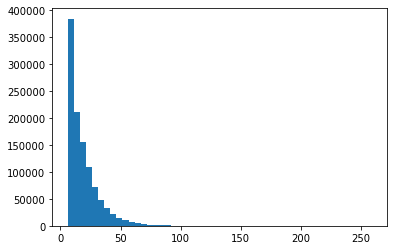

In [12]:
len_list=[]
for bin in traj_list_bin_24_sampled:
    for traj in bin:
        len_list.append(len(traj))
    
len_list=np.array(len_list)
plt.hist(len_list, bins=50)
plt.show()

In [13]:
traj_list_all=[]
len_max=80

for bin in traj_list_bin_24_sampled:
    for traj in bin:
        if len(traj)>len_max:
            continue
        road_ids=[]
        for point in traj:
            road_ids.append(point[0])
        traj_list_all.append(road_ids)

len(traj_list_all)

1076886

In [14]:
np.save(f"../data/sz_taxi_202006/sz_taxi_202006_traj_list_bin_24_sampled_{p}_flatten_id.npy", traj_list_all)

/home/cseadmin/dz/anaconda3/envs/torch1.11/lib/python3.8/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
